In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

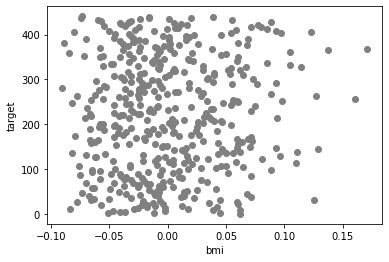

In [100]:
df = pd.read_csv('bmi.csv')
df.columns = ['target', 'bmi']
 
# del df['Index']
# feature: Data  -> X
# target:  Index -> y

plt.scatter(df['bmi'], df['target'], color = 'grey')

plt.xlabel('bmi')
plt.ylabel('target')

plt.show()

In [101]:
df.head(10)

,target,bmi
0,0,0.061696
1,1,-0.051474
2,2,0.044451
3,3,-0.011595
4,4,-0.036385
5,5,-0.040696
6,6,-0.047163
7,7,-0.001895
8,8,0.061696
9,9,0.039062


In [102]:
df['bmi'].describe()

count    4.420000e+02
mean    -8.015207e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64

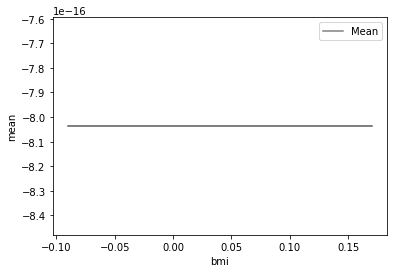

In [103]:
# Plot mean of data

# mean = data_column.mean()
def mean():
    data_column = df['bmi']
    return sum(data_column) / float(len(data_column))

df['bmi_mean'] = mean()
# data_mean = [mean() for _ in range(len(data_column))]

plt.plot(df['bmi'], df['bmi_mean'], color = 'grey', label = 'Mean')

plt.xlabel('bmi') 
plt.ylabel('mean') 

plt.legend()

plt.show()

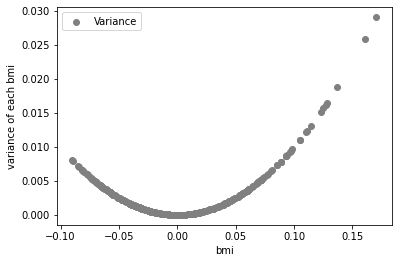

In [104]:
# Plot variance of each row in data
df['variance_of_each_bmi'] = (df['bmi'] - df['bmi_mean']) ** 2

plt.scatter(df['bmi'], df['variance_of_each_bmi'], color = 'grey', label = 'Variance')

plt.xlabel('bmi') 
plt.ylabel('variance of each bmi') 

plt.legend()

plt.show()

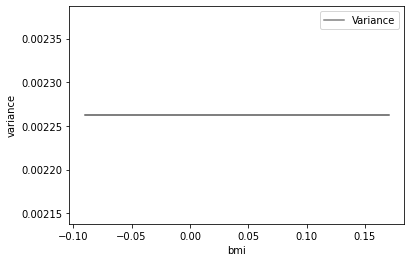

In [105]:
# Plot variance of data
df['variance_of_bmi'] = sum(df['variance_of_each_bmi']) / len(df['variance_of_each_bmi'])

plt.plot(df['bmi'], df['variance_of_bmi'], color = 'grey', label = 'Variance')

plt.xlabel('bmi') 
plt.ylabel('variance') 

plt.legend()

plt.show()

In [106]:
df

,target,bmi,bmi_mean,variance_of_each_bmi,variance_of_bmi
0,0,0.061696,-8.036558e-16,0.003806,0.002262
1,1,-0.051474,-8.036558e-16,0.002650,0.002262
2,2,0.044451,-8.036558e-16,0.001976,0.002262
3,3,-0.011595,-8.036558e-16,0.000134,0.002262
4,4,-0.036385,-8.036558e-16,0.001324,0.002262
...,...,...,...,...,...
437,437,0.019662,-8.036558e-16,0.000387,0.002262
438,438,-0.015906,-8.036558e-16,0.000253,0.002262
439,439,-0.015906,-8.036558e-16,0.000253,0.002262
440,440,0.039062,-8.036558e-16,0.001526,0.002262


In [92]:
# Split data
from sklearn.model_selection import train_test_split

X = df['bmi'].values.reshape(-1, 1)
y = df['target'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [98]:
# Linear Regression class
class Linear_Regression:
    def __init__(self):
        self.x = None
        self.y = None
        self.alpha0 = None
        self.alpha1 = None
        self.coeffients = []
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        xmean = x.mean()
        ymean = y.mean()
        
        sum0, sum1 = 0, 0
        for i in range(len(x)):
            sum0 += (x[i] - xmean) * (y[i] - ymean)
            sum1 += (x[i] - xmean) ** 2
        
        # alpha1 is m and alpha0 is b
        self.alpha1 = float(sum0 / sum1) 
        self.alpha0 = ymean - float(self.alpha1 * xmean)
        
        self.coeffients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self, x):
        # m * x + b
        return self.coeffients[1] * x + self.coeffients[0]
    
    def mse(self, ytest, ypred):
        ysum = 0
        for i in range(len(ytest)):
            ysum += (ypred[i] - ytest[i]) ** 2
        
        return float(ysum / len(ytest))

In [97]:
# Use dataset to create sample Linear regression
model = Linear_Regression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print("MSE: ", model.mse(y_test, y_predict))

MSE:  16529.019837441483


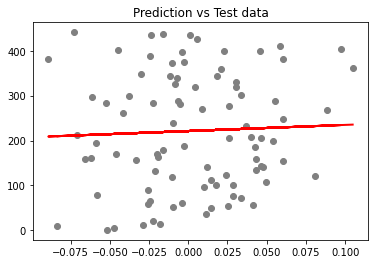

In [96]:
# Plot data and the line
plt.scatter(X_test, y_test, color = "grey")
plt.plot(X_test, y_predict, color = "red", linewidth=2)

plt.title("Prediction vs Test data")

plt.show()